<a href="https://colab.research.google.com/github/alishermutalov/ML-learning/blob/ml/First_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [5]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN


In [6]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN


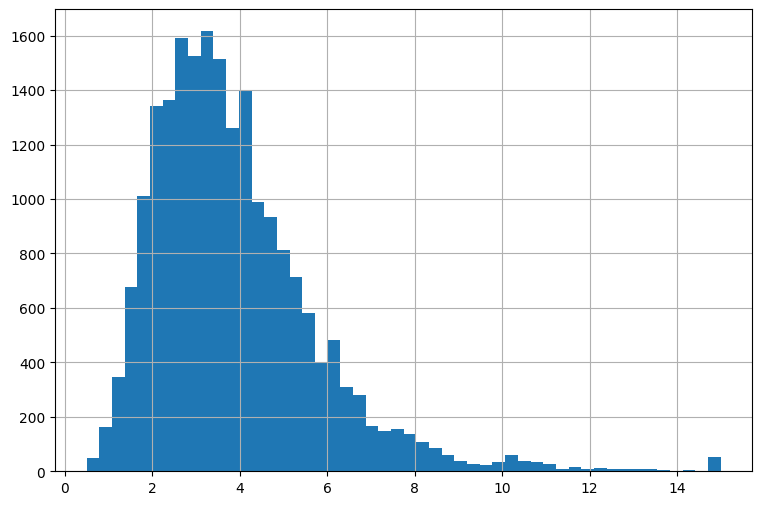

In [7]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(9,6))
plt.show()

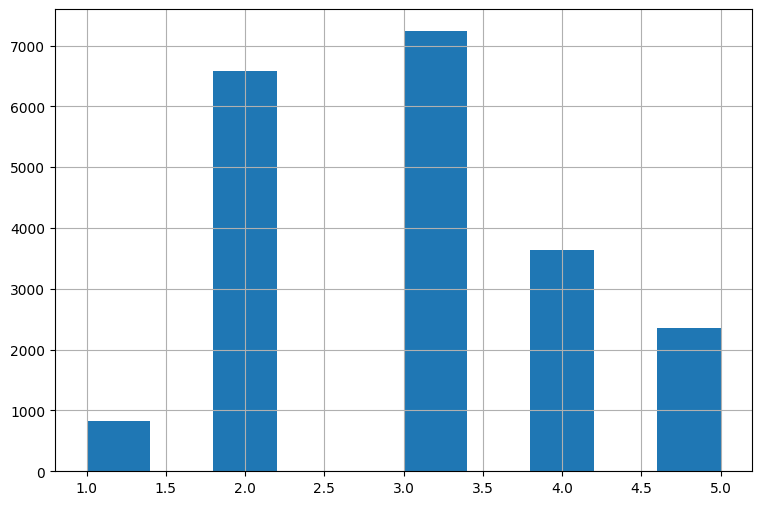

In [8]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [9]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
9410,-122.56,37.90,24.0,221.0,41.0,75.0,38.0,5.1292,362500.0,NEAR BAY,4
15824,-122.42,37.75,52.0,1974.0,525.0,935.0,465.0,2.7173,300000.0,NEAR BAY,2
3613,-118.41,34.23,35.0,1026.0,195.0,753.0,185.0,4.5909,179200.0,<1H OCEAN,4
10819,-117.92,33.64,5.0,949.0,287.0,497.0,244.0,2.7500,225000.0,<1H OCEAN,2
17559,-121.88,37.32,30.0,1242.0,338.0,1438.0,325.0,2.6607,169300.0,<1H OCEAN,2
2842,-118.98,35.40,36.0,1443.0,273.0,680.0,259.0,2.9821,73100.0,INLAND,2
5228,-118.24,33.94,37.0,869.0,241.0,1040.0,233.0,2.0000,84200.0,<1H OCEAN,2
1208,-121.79,39.48,39.0,1105.0,180.0,408.0,166.0,3.3929,82100.0,INLAND,3
14279,-117.13,32.71,38.0,993.0,246.0,760.0,205.0,1.1563,82700.0,NEAR OCEAN,1
2307,-119.76,36.83,17.0,3690.0,628.0,1888.0,601.0,4.0196,84200.0,INLAND,3


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
strasified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

In [12]:
for train_index, test_index in strasified_split.split(df, df['income_cat']):
    st_train_set = df.loc[train_index]
    st_test_set = df.loc[test_index]

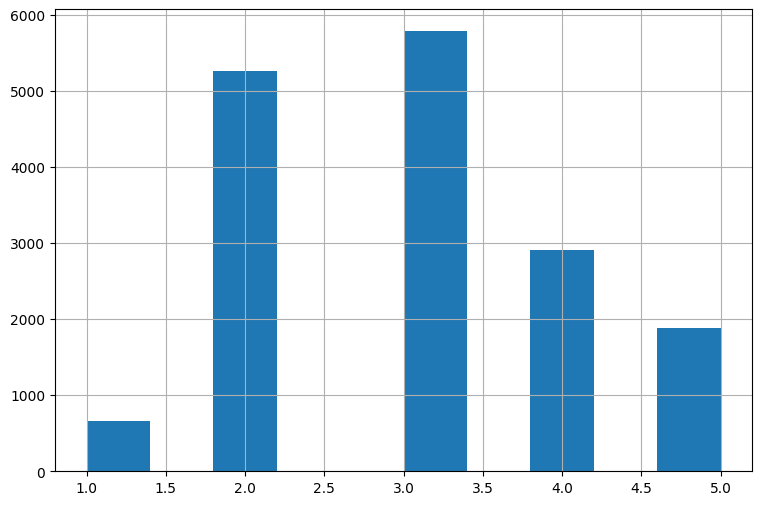

In [13]:
st_train_set['income_cat'].hist(figsize=(9,6))
plt.show()

In [14]:
st_train_set.drop('income_cat', axis=1, inplace=True)
st_test_set.drop('income_cat', axis=1, inplace=True)
st_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND


In [15]:
housing = st_train_set.copy()

In [16]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND


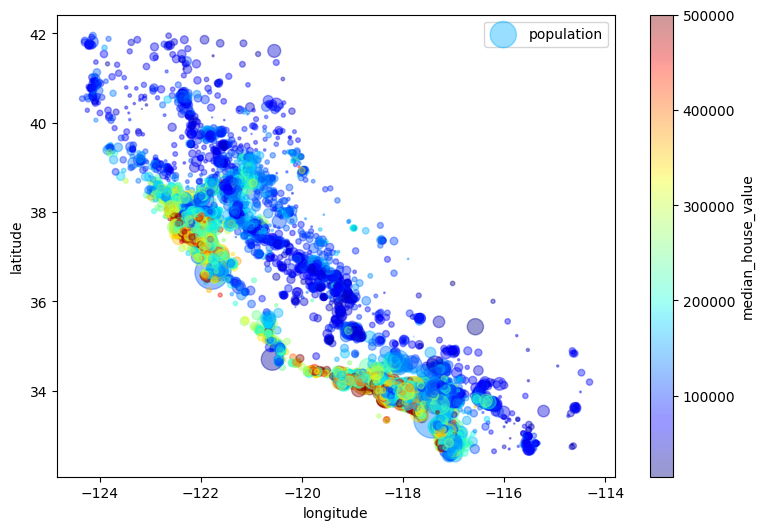

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(9,6), alpha=0.4, s = housing['population']/50, colorbar=True, label='population', c='median_house_value', cmap=plt.get_cmap('jet'))
plt.show()

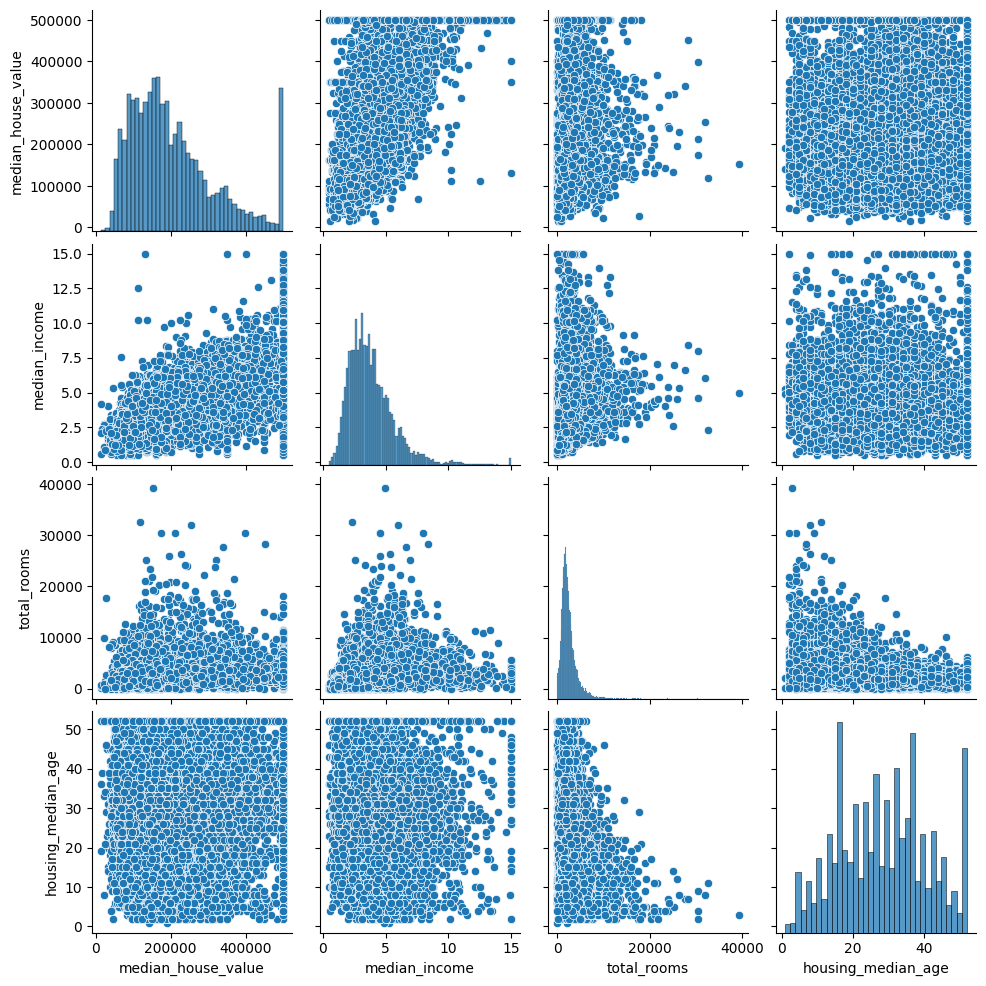

In [18]:
cols = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[cols])
plt.show()

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [20]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [21]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0
...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0


In [22]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([-1.1848e+02,  3.4250e+01,  2.9000e+01,  2.1290e+03,  4.3600e+02,
        1.1680e+03,  4.1100e+02,  3.5341e+00,  1.7920e+05])

In [24]:
x = imputer.transform(housing_num)
x

array([[-1.2126e+02,  3.7880e+01,  4.2000e+01, ...,  9.3000e+01,
         3.1719e+00,  1.5830e+05],
       [-1.2164e+02,  3.7850e+01,  2.2000e+01, ...,  3.2000e+02,
         4.4583e+00,  2.5390e+05],
       [-1.1815e+02,  3.3950e+01,  3.5000e+01, ...,  6.1400e+02,
         2.7875e+00,  2.0900e+05],
       ...,
       [-1.1827e+02,  3.4170e+01,  4.8000e+01, ...,  2.6900e+02,
         5.5118e+00,  3.5470e+05],
       [-1.2133e+02,  3.7980e+01,  3.6000e+01, ...,  5.4400e+02,
         3.4625e+00,  8.4600e+04],
       [-1.1840e+02,  3.4000e+01,  3.7000e+01, ...,  2.5900e+02,
         5.4440e+00,  3.3600e+05]])

In [25]:
X = imputer.fit_transform(housing_num)

In [26]:
X

array([[-1.2126e+02,  3.7880e+01,  4.2000e+01, ...,  9.3000e+01,
         3.1719e+00,  1.5830e+05],
       [-1.2164e+02,  3.7850e+01,  2.2000e+01, ...,  3.2000e+02,
         4.4583e+00,  2.5390e+05],
       [-1.1815e+02,  3.3950e+01,  3.5000e+01, ...,  6.1400e+02,
         2.7875e+00,  2.0900e+05],
       ...,
       [-1.1827e+02,  3.4170e+01,  4.8000e+01, ...,  2.6900e+02,
         5.5118e+00,  3.5470e+05],
       [-1.2133e+02,  3.7980e+01,  3.6000e+01, ...,  5.4400e+02,
         3.4625e+00,  8.4600e+04],
       [-1.1840e+02,  3.4000e+01,  3.7000e+01, ...,  2.5900e+02,
         5.4440e+00,  3.3600e+05]])

In [27]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0
...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0


In [28]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[['ocean_proximity']])
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.]])

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[['ocean_proximity']])
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [30]:
housing_onehot = pd.get_dummies(housing['ocean_proximity'])
housing_onehot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16415,False,True,False,False,False
1279,False,True,False,False,False
7741,True,False,False,False,False
4425,True,False,False,False,False
1283,False,True,False,False,False
...,...,...,...,...,...
1221,False,True,False,False,False
12640,False,True,False,False,False
5747,True,False,False,False,False
16224,False,True,False,False,False
